<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means.  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [35]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


<Figure size 1152x648 with 0 Axes>

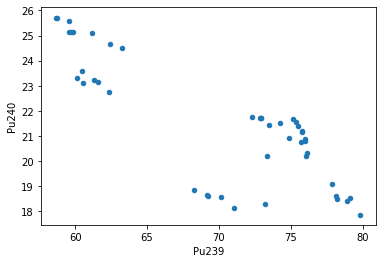

In [36]:
features = ['Pu239', 'Pu240']
plot = df[features]
plt.figure(figsize = (16,9))

plot.plot(x = 'Pu239', y = 'Pu240', kind = 'scatter')

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [37]:
X = df[features]

km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [38]:
df['cluster'] = km.labels_
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,cluster
0,1,0.126,75.804,21.204,2.180,2
1,2,0.133,75.515,21.408,2.240,2
2,3,0.127,75.175,21.668,2.305,2
3,4,0.156,78.872,18.428,1.906,2
4,5,0.503,73.317,20.223,4.128,0


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [39]:
## Create a dataframe for cluster_centers (centroids)
centroids = df.groupby(by = 'cluster')[['Pu239', 'Pu240']].mean()

<Figure size 504x504 with 0 Axes>

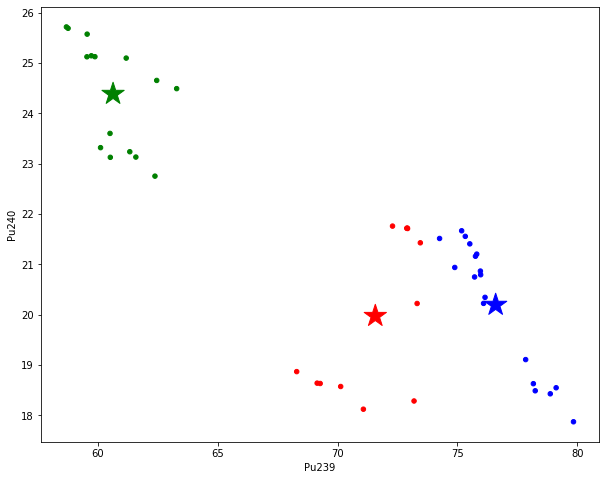

In [41]:
# Code taken from class notes

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [42]:
silhouette_score(X, km.labels_)

0.5950619279181214

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [43]:
X = df[features]

sc = StandardScaler()
Z = sc.fit_transform(X)

km2 = KMeans(n_clusters=3)
km2.fit(Z)

df['cluster_scaled'] = km2.labels_
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,cluster,color,cluster_scaled
0,1,0.126,75.804,21.204,2.180,2,blue,0
1,2,0.133,75.515,21.408,2.240,2,blue,0
2,3,0.127,75.175,21.668,2.305,2,blue,0
3,4,0.156,78.872,18.428,1.906,2,blue,2
4,5,0.503,73.317,20.223,4.128,0,red,0


In [44]:
## Create a dataframe for cluster_centers (centroids)
centroids = df.groupby(by = 'cluster_scaled')[['Pu239', 'Pu240']].mean()

<Figure size 504x504 with 0 Axes>

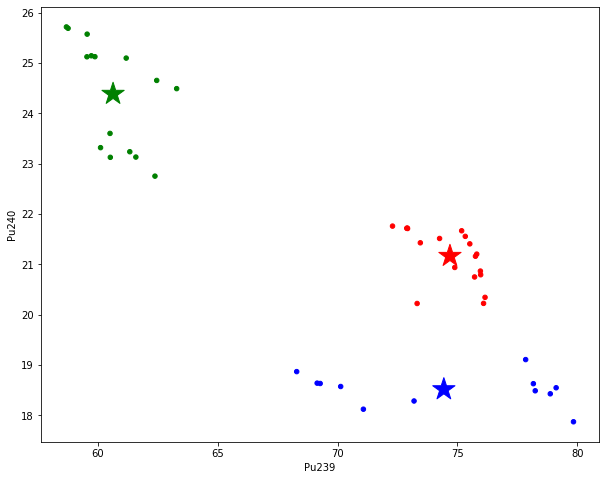

In [45]:
# Code taken from class notes

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster_scaled'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [48]:
silhouette_score(X, km2.labels_)

0.5342202492727395